In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter
from scipy import stats


### Выделяем период

In [2]:
start_date='1/1/2017'
end_date ='3/1/2017'

In [4]:
x_date = pd.date_range(start_date,end_date)
x_d =list(x_date)
x_d

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-03 00:00:00'),
 Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-07 00:00:00'),
 Timestamp('2017-01-08 00:00:00'),
 Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-10 00:00:00'),
 Timestamp('2017-01-11 00:00:00'),
 Timestamp('2017-01-12 00:00:00'),
 Timestamp('2017-01-13 00:00:00'),
 Timestamp('2017-01-14 00:00:00'),
 Timestamp('2017-01-15 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-01-17 00:00:00'),
 Timestamp('2017-01-18 00:00:00'),
 Timestamp('2017-01-19 00:00:00'),
 Timestamp('2017-01-20 00:00:00'),
 Timestamp('2017-01-21 00:00:00'),
 Timestamp('2017-01-22 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-01-24 00:00:00'),
 Timestamp('2017-01-25 00:00:00'),
 Timestamp('2017-01-26 00:00:00'),
 Timestamp('2017-01-27 00:00:00'),
 Timestamp('2017-01-28 00:00:00'),
 Timestamp('2017-01-

###  Мир без Дисперсии

In [5]:
hand_amount_per_day = 10000
bet_per_hand = 50
ev_for_house = 0.027


In [6]:
def no_swing(hand_amount_per_day,bet_per_hand,ev_for_house) -> float:
    return hand_amount_per_day*bet_per_hand*ev_for_house

In [7]:
house_res = np.array([no_swing(hand_amount_per_day,bet_per_hand,ev_for_house) for _ in x_date])


In [8]:
def show_gragh(x_date,house_res):
    f, ax = plt.subplots(1, 1)
    f.set_size_inches(12, 7)     
    f.set_facecolor('#eee')    
    ax.set_ylabel('Day result')
    house_res_ev = np.full_like(house_res,house_res.mean())
    ax.plot(x_date, house_res)
    ax.plot(x_date, house_res_ev)
    ax.grid()
    ax.tick_params(axis='x', labelrotation=45)
    plt.show()

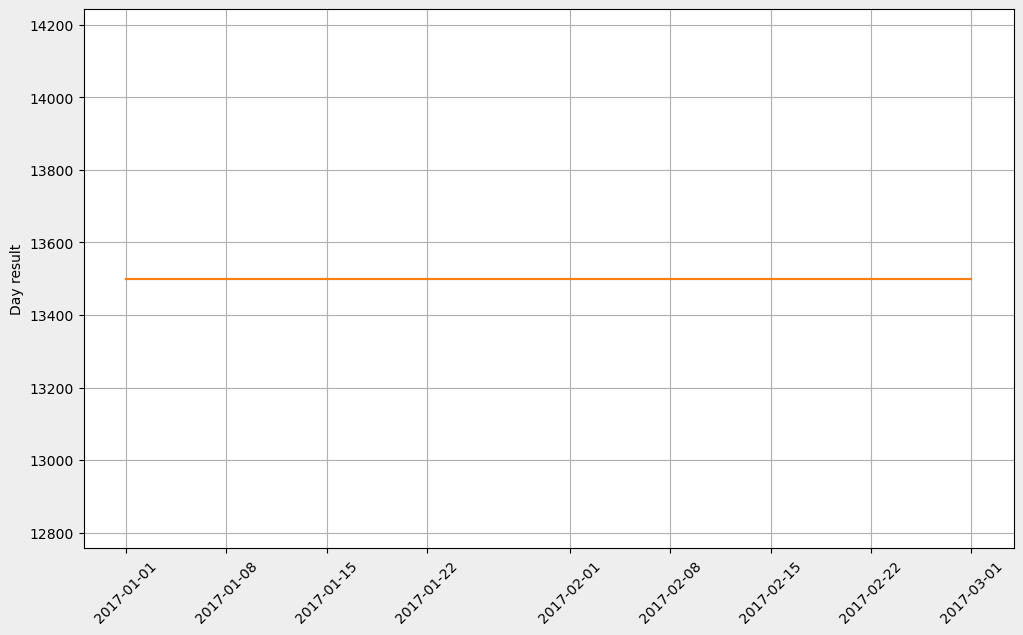

In [9]:
show_gragh(x_date,house_res)

###  Добавляем качели 

In [10]:
std_one_hand = 1.1

In [11]:
# вычисляем качели в у.е.
def count_std_per_day(std_one_hand,hand_amount_per_day,bet_per_hand) -> float:
    return std_one_hand*(hand_amount_per_day**0.5)*bet_per_hand
std_per_day = count_std_per_day(std_one_hand,hand_amount_per_day,bet_per_hand)

In [12]:
# создаем генератор нормально распределения, который будет обозначать насколько качает результат дня 
norm_gen = stats.norm(0,std_per_day)

In [13]:
# генерируем случайный шум
house_res_std = np.array([no_swing(hand_amount_per_day,bet_per_hand,ev_for_house)+norm_gen.rvs() for _ in x_date])

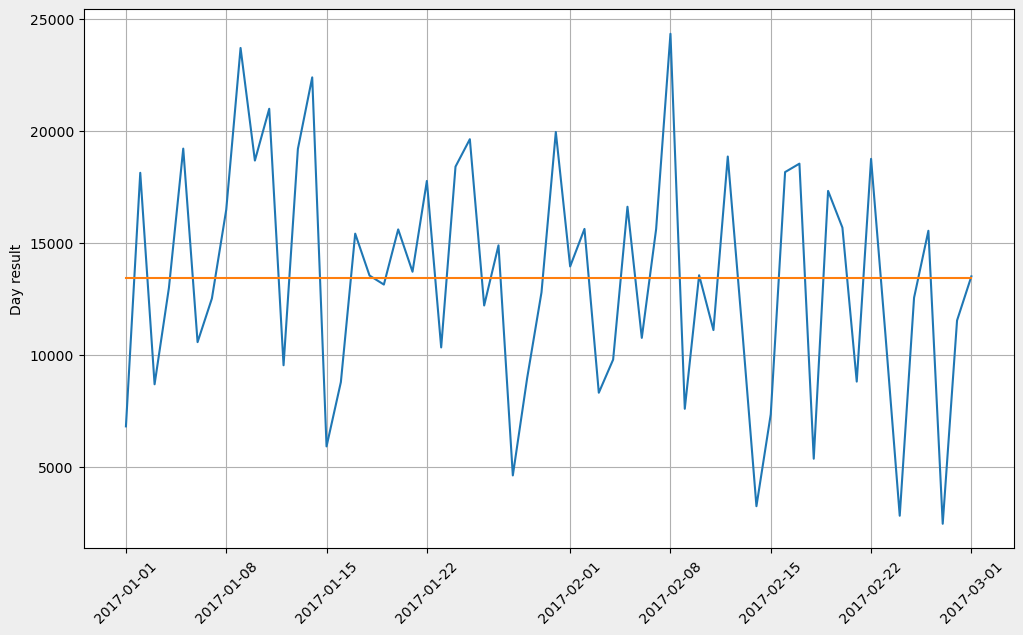

In [14]:
show_gragh(x_date,house_res_std)

###  Добавляем Влияние Дней Недели 

In [16]:
ts = pd.Timestamp(x_date[0])

In [17]:
ts

Timestamp('2017-01-01 00:00:00')

In [18]:
ts.weekday()

6

In [19]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [20]:
week_day_coef=[0.5,0.6,0.7,0.6,1.2,1.3,1]

<StemContainer object of 3 artists>

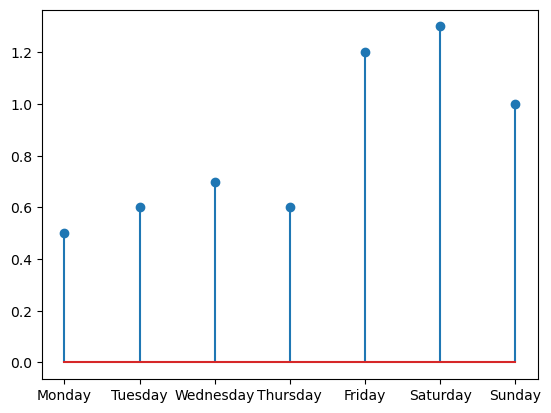

In [21]:
plt.stem(days,week_day_coef)

In [22]:
def house_res_swing_and_weekly(hand_amount_per_day,bet_per_hand,ev_for_house,std_one_hand,week_day_coef,date) -> float:
    ts = pd.Timestamp(date)
    day_coeff = week_day_coef[ts.weekday()]
    hand_this_day = hand_amount_per_day*day_coeff
    bet_this_day = bet_per_hand*day_coeff
    ev_day = bet_this_day*hand_this_day*ev_for_house
    return stats.norm(ev_day,std_one_hand*bet_per_hand*(hand_this_day**0.5)).rvs()
    

In [23]:
house_res_std_weekle = np.array([house_res_swing_and_weekly(hand_amount_per_day,bet_per_hand,ev_for_house,std_one_hand,week_day_coef,date) for date in x_date])

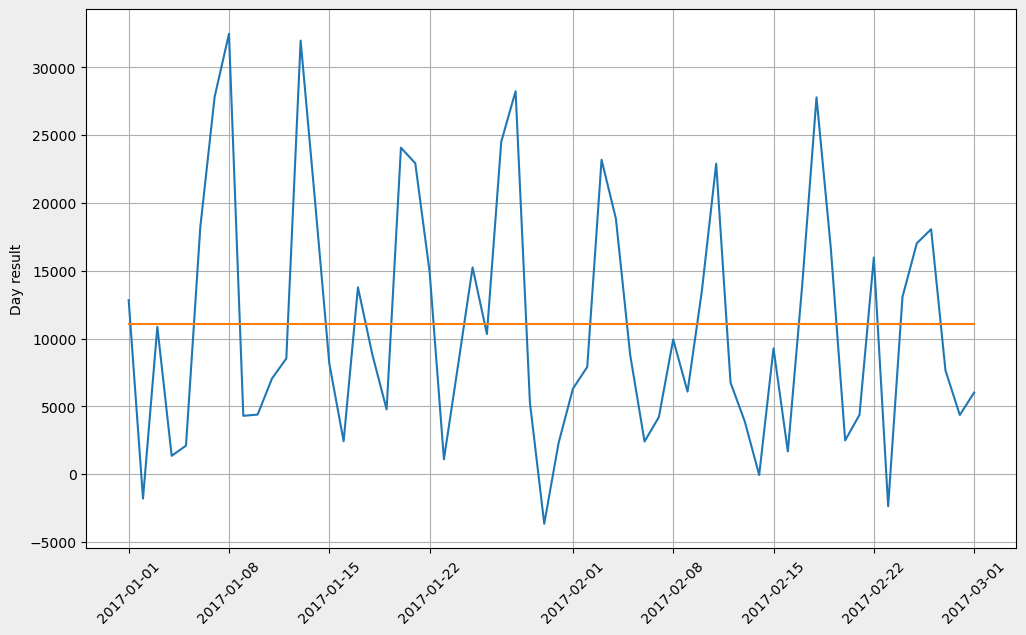

In [24]:
show_gragh(x_date,house_res_std_weekle)

###  Тренд

In [33]:
x = np.arange(len(x_d))
y = 3*x/x.shape

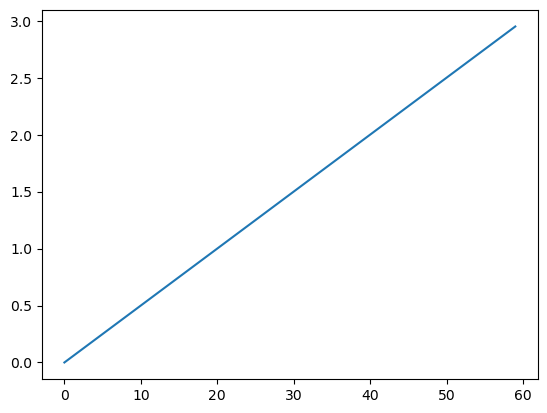

In [34]:
plt.plot(x,y)

In [35]:
house_res_std_weekle_trend = house_res_std_weekle + house_res_std_weekle * y

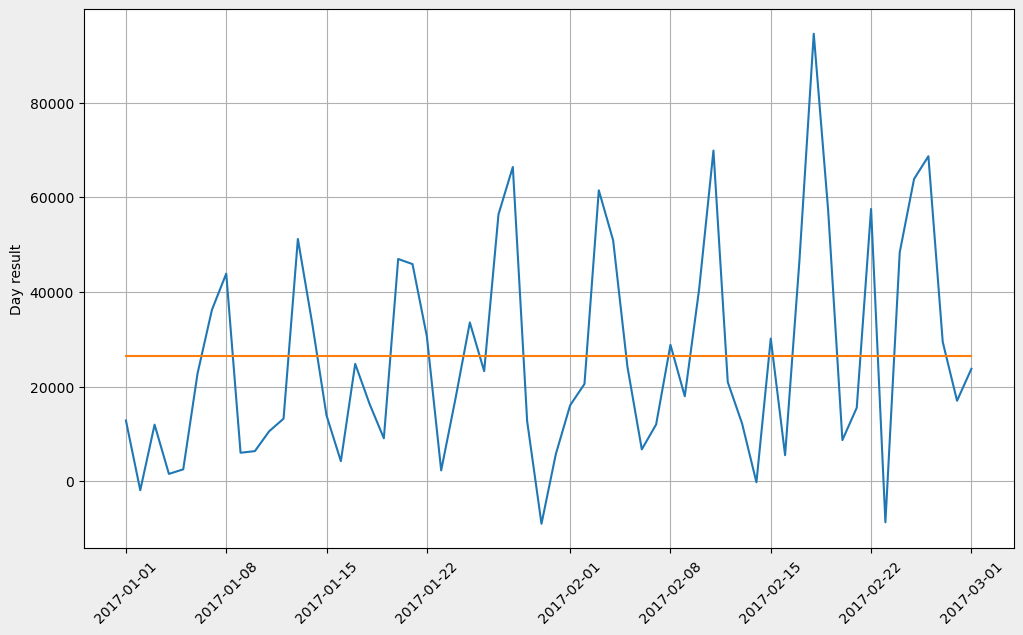

In [36]:
show_gragh(x_date,house_res_std_weekle_trend)

### Варианты избавления от тренда

* Скользящее среднее
* Апроксимация полиномом (многочленом)
* Диффер-ция


#### Игра на тъер

In [37]:
tier_by_100 = np.random.choice([-600, 1200], size=100, p=[25/37,12/37])

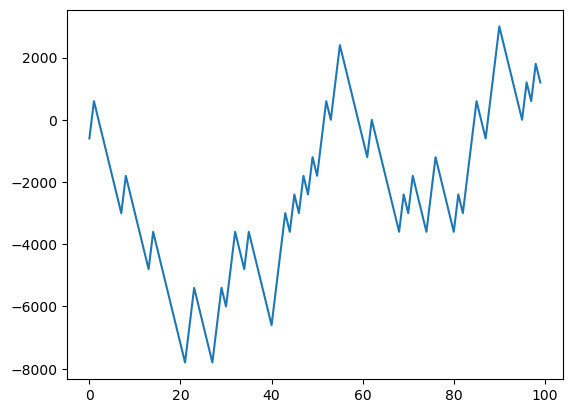

In [38]:
plr_res = tier_by_100.cumsum()
plt.plot(plr_res)

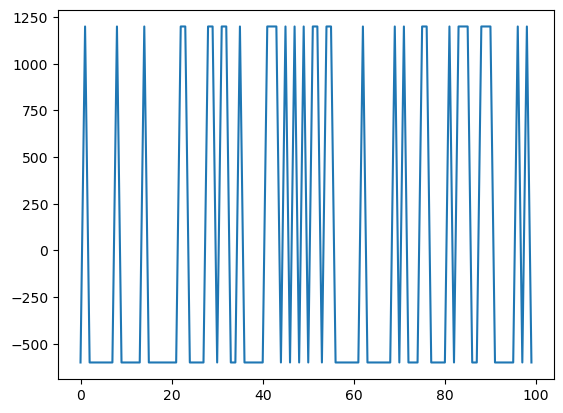

In [39]:
plt.plot(tier_by_100)